In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
tf.random.set_seed(3)

In [2]:
#Loading the dataset
(X_train,Y_train),(X_test, Y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


3


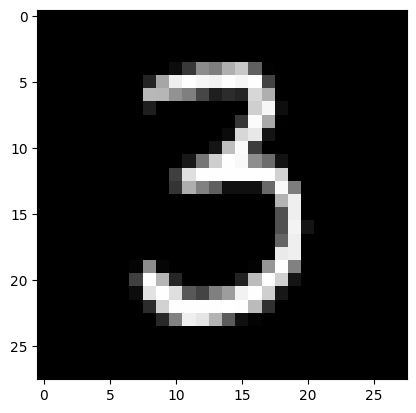

In [4]:
#Checking the dataset
plt.imshow(X_train[50], cmap='gray')
print(Y_train[50])

In [5]:
X_train=X_train/255
X_test=X_test/255

In [6]:

#Setting up the layers of the neural Network
model=keras.Sequential([
    keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',padding = 'Same', input_shape=(28,28,1), ),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu', padding = 'Same', ),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation='softmax')
])

In [7]:
#Compiling the model

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
#Training the model
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 5ms/step - loss: 0.3839 - accuracy: 0.8772
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1539 - accuracy: 0.9533
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1197 - accuracy: 0.9649
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0950 - accuracy: 0.9708
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0848 - accuracy: 0.9744
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0729 - accuracy: 0.9777
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0636 - accuracy: 0.9805
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0618 - accuracy: 0.9816
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0568 - accuracy: 0.9825
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0

In [9]:
#Accuracy on test_data
loss,accuracy=model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0299 - accuracy: 0.9919


In [10]:
#Printing the shape of test data
X_test.shape

(10000, 28, 28)

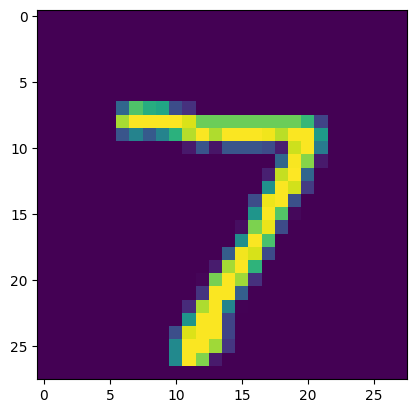

In [11]:
#First data point in the train dataset
plt.imshow(X_test[0])
plt.show()

In [12]:
print(Y_test[0])

7


In [13]:
X_test.shape

(10000, 28, 28)

In [14]:
#Model.predict() gives the prediction probability of each class for that data point
Y_pred=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [15]:
Y_pred.shape

(10000, 10)

In [16]:
print(Y_pred[0])

[1.6676808e-20 6.7673267e-10 1.2942635e-12 5.9283400e-13 2.2860671e-13
 1.8110405e-17 6.5609928e-22 1.0000000e+00 7.5031798e-16 1.3593045e-10]


In [17]:
#This gives the probbaility of all the labels

In [18]:
label_for_first_img=np.argmax(Y_pred[0])
print(label_for_first_img)

7


In [19]:
#Converting the prediction prob to class labels for all test data points

Y_pred_labels=[np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 2, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [20]:
#Building the confusion Matrix
conf_mat=confusion_matrix(Y_test,Y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 974    0    0    1    0    0    3    0    1    1]
 [   0 1132    0    1    0    0    0    2    0    0]
 [   1    2 1024    2    0    0    0    3    0    0]
 [   0    0    0 1006    0    3    0    0    1    0]
 [   0    0    0    0  968    0    2    0    2   10]
 [   0    0    0    3    0  887    1    0    1    0]
 [   1    2    0    0    1    4  948    0    2    0]
 [   0    2    4    3    0    0    0 1016    1    2]
 [   0    0    3    1    0    3    0    0  966    1]
 [   0    0    0    0    2    5    0    1    3  998]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

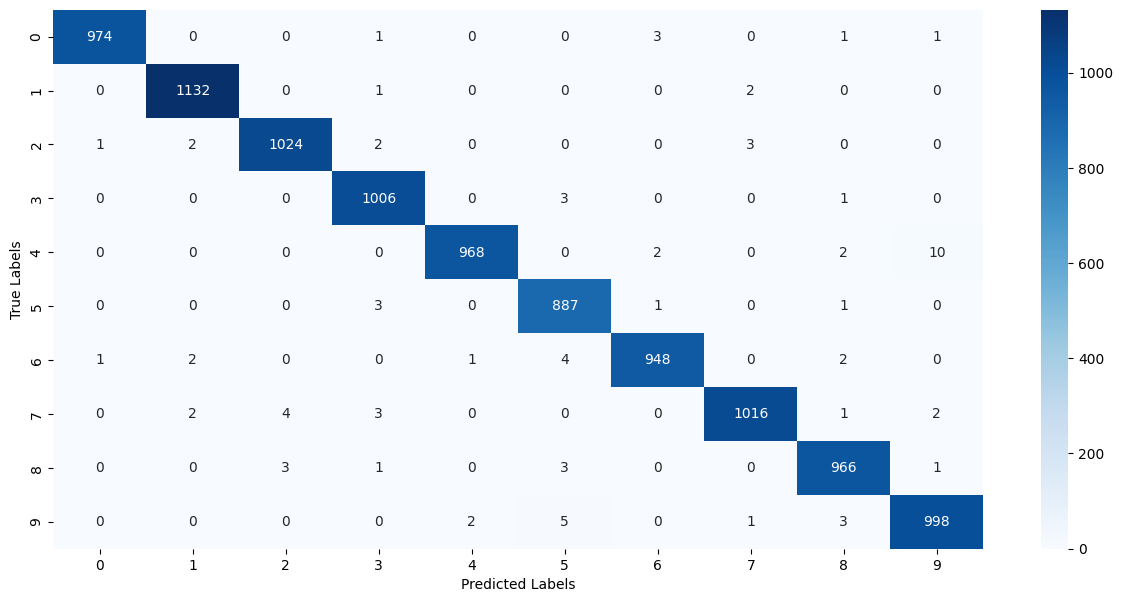

In [21]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [ ]:
print(X_test[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [22]:
model.save('my_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
## Inference

In [ ]:
model=tf.keras.models.load_model('my_model.h5')

In [ ]:
model.predict(X_test[:2])

1/1 [==============================] - 0s 338ms/step


array([[3.0489839e-20, 3.8324290e-14, 9.8363082e-13, 1.8812341e-14,
        5.3742811e-16, 1.3071084e-17, 6.6352735e-28, 1.0000000e+00,
        1.3979111e-17, 2.3049256e-12],
       [9.3636579e-14, 4.5586805e-14, 1.0000000e+00, 6.3916190e-16,
        3.8875832e-16, 1.2568779e-21, 5.5012017e-13, 2.7652072e-17,
        6.3177358e-15, 6.9850802e-20]], dtype=float32)